Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.K7FMID_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Preprocessing images...
Dataset shape: (2000, 4096), Labels shape: (2000,)
Training SVM...
Accuracy: 54.75%
Classification Report:
              precision    recall  f1-score   support

         Cat       0.54      0.58      0.56       198
         Dog       0.56      0.51      0.53       202

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



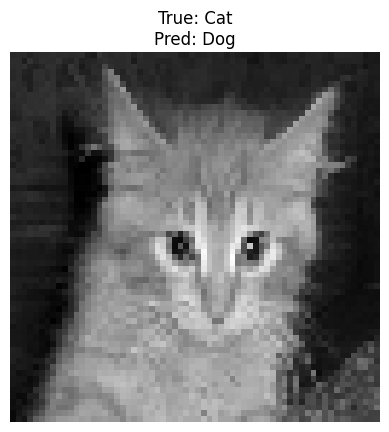

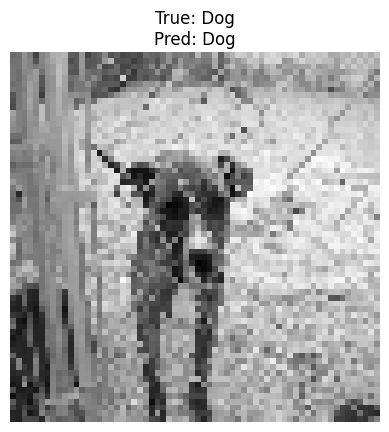

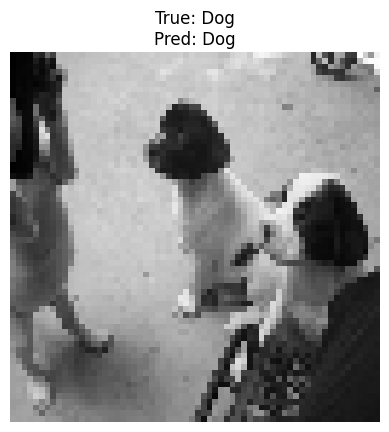

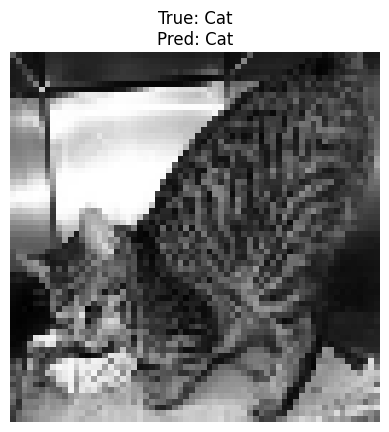

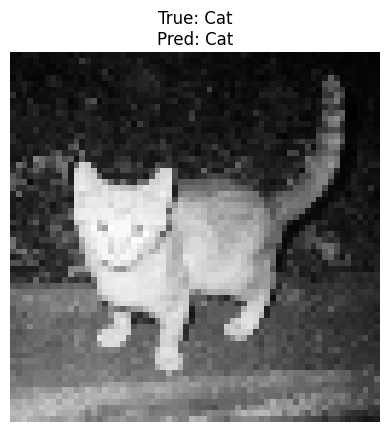

In [ ]:
# Install TensorFlow Datasets if not installed
!pip install tensorflow-datasets opencv-python --quiet

import tensorflow_datasets as tfds
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Parameters
IMG_SIZE = 64  # resize images to 64x64
NUM_SAMPLES = 2000  # number of images to use (for speed)

# Load dataset
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)
all_data = dataset['train']

# Function to preprocess images (resize and grayscale)
def preprocess(image, label):
    image = tfds.as_numpy(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    return resized, label

# Convert TF dataset to numpy arrays (images flattened + labels)
data = []
labels = []

print("Preprocessing images...")
count = 0
for img, label in tfds.as_numpy(all_data):
    if count >= NUM_SAMPLES:
        break
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    data.append(resized.flatten())
    labels.append(label)
    count += 1

X = np.array(data)
y = np.array(labels)

print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm = SVC(kernel='linear', random_state=42)
print("Training SVM...")
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# Visualize some test images with predictions
def show_images(X, y_true, y_pred=None, n=5):
    for i in range(n):
        plt.imshow(X[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        title = f"True: {'Dog' if y_true[i] else 'Cat'}"
        if y_pred is not None:
            title += f"\nPred: {'Dog' if y_pred[i] else 'Cat'}"
        plt.title(title)
        plt.axis('off')
        plt.show()

show_images(X_test, y_test, y_pred)
